In [1]:
####################### ALL ########################

# Make graphs interactive
%matplotlib inline
%matplotlib notebook

# import dependences
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import datetime

# plot.ly dependencies
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
####################### ALL ########################

# load in the csv
crime_data = '../crime_data.csv'
# create the data frame and display a sample
crime_df = pd.read_csv(crime_data)
crime_df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [3]:
####################### ALL ########################

# pull out just the drug/narcotic crimes
crime_drug = crime_df[crime_df["Category"] == "DRUG/NARCOTIC"]
crime_drug = crime_drug.set_index("Category")

# insert a year column
crime_drug["Year"] = pd.DatetimeIndex(crime_drug["Date"]).year
crime_drug["Month"] = pd.DatetimeIndex(crime_drug["Date"]).month
crime_drug.head()

,IncidntNum,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month
Category,,,,,,,,,,,,,,
DRUG/NARCOTIC,150098345,POSSESSION OF METH-AMPHETAMINE,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516650,2015,2
DRUG/NARCOTIC,150098345,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516710,2015,2
DRUG/NARCOTIC,150098458,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Sunday,02/01/2015,16:56,MISSION,"ARREST, BOOKED",2000 Block of MISSION ST,-122.419520,37.764229,"(37.764228935718, -122.419520367886)",15009845816623,2015,2
DRUG/NARCOTIC,150098527,POSSESSION OF METH-AMPHETAMINE,Sunday,02/01/2015,17:02,MISSION,"ARREST, BOOKED",MISSION ST / 15TH ST,-122.419828,37.766674,"(37.7666737551835, -122.419827929961)",15009852716650,2015,2
DRUG/NARCOTIC,150098997,POSSESSION OF MARIJUANA,Sunday,02/01/2015,20:35,SOUTHERN,NONE,700 Block of MARKET ST,-122.403919,37.787116,"(37.7871160984672, -122.403919148357)",15009899716010,2015,2


In [4]:
####################### ALL ########################

# Pull out 2013 to 2017
crime_drug = crime_drug.loc[(crime_drug["Year"] >= 2013) & (crime_drug["Year"] <= 2017), :]
crime_drug

,IncidntNum,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month
Category,,,,,,,,,,,,,,
DRUG/NARCOTIC,150098345,POSSESSION OF METH-AMPHETAMINE,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516650,2015,2
DRUG/NARCOTIC,150098345,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,02/01/2015,14:00,MISSION,"ARREST, BOOKED",1700 Block of HARRISON ST,-122.413354,37.769075,"(37.7690748003847, -122.413354187018)",15009834516710,2015,2
DRUG/NARCOTIC,150098458,POSSESSION OF BASE/ROCK COCAINE FOR SALE,Sunday,02/01/2015,16:56,MISSION,"ARREST, BOOKED",2000 Block of MISSION ST,-122.419520,37.764229,"(37.764228935718, -122.419520367886)",15009845816623,2015,2
DRUG/NARCOTIC,150098527,POSSESSION OF METH-AMPHETAMINE,Sunday,02/01/2015,17:02,MISSION,"ARREST, BOOKED",MISSION ST / 15TH ST,-122.419828,37.766674,"(37.7666737551835, -122.419827929961)",15009852716650,2015,2
DRUG/NARCOTIC,150098997,POSSESSION OF MARIJUANA,Sunday,02/01/2015,20:35,SOUTHERN,NONE,700 Block of MARKET ST,-122.403919,37.787116,"(37.7871160984672, -122.403919148357)",15009899716010,2015,2
DRUG/NARCOTIC,150099268,POSSESSION OF NARCOTICS PARAPHERNALIA,Sunday,02/01/2015,22:34,NORTHERN,"ARREST, BOOKED",POLK ST / BUSH ST,-122.420307,37.788699,"(37.7886989511647, -122.420307355721)",15009926816710,2015,2
DRUG/NARCOTIC,150099412,POSSESSION OF CONTROLLED SUBSTANCE,Sunday,02/01/2015,23:34,TENDERLOIN,"ARREST, BOOKED",0 Block of TURK ST,-122.409854,37.783386,"(37.7833862379382, -122.409853729941)",15009941216660,2015,2
DRUG/NARCOTIC,150099575,POSSESSION OF CONTROLLED SUBSTANCE,Monday,02/02/2015,02:23,TENDERLOIN,"ARREST, BOOKED",100 Block of LEAVENWORTH ST,-122.414030,37.782329,"(37.7823291237659, -122.414029821727)",15009957516660,2015,2
DRUG/NARCOTIC,150099810,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,02/02/2015,08:17,PARK,"ARREST, BOOKED",KEZAR DR / MARTIN LUTHER KING JR DR,-122.458639,37.767200,"(37.7671999403456, -122.458638758608)",15009981016710,2015,2


In [5]:
####################### FW ########################

# #Clean up the df
# pull drug crimes just related to the 4 major drugs
searchfor = ['COCAINE', 'HEROIN', 'METH', 'MARIJUANA']
drugs = crime_drug[crime_drug['Descript'].str.contains('|'.join(searchfor))]

# Pull out just cocaine and add a new column with drug name
searchfor = ['COCAINE']
coca = drugs[drugs['Descript'].str.contains('|'.join(searchfor))]
coca['Drug'] = 'Cocaine'
# Pull out just heroin and add a new column with drug name
searchfor = ['HEROIN']
heroin = drugs[drugs['Descript'].str.contains('|'.join(searchfor))]
heroin['Drug'] = 'Heroin'
# Pull out just marijuana and add a new column with drug name
searchfor = ['MARIJUANA']
mj = drugs[drugs['Descript'].str.contains('|'.join(searchfor))]
mj['Drug'] = 'Marijuana'
# Pull out just meth and add a new column with drug name
searchfor = ['METH']
meth = drugs[drugs['Descript'].str.contains('|'.join(searchfor))]
meth['Drug'] = 'Meth'

# Combine everything back into one df
frames = [coca, heroin, mj, meth]
drug_label = pd.concat(frames)
drug_label.sample(5)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,IncidntNum,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month,Drug
Category,,,,,,,,,,,,,,,
DRUG/NARCOTIC,130946770,POSSESSION OF MARIJUANA FOR SALES,Thursday,11/07/2013,23:19,SOUTHERN,"ARREST, BOOKED",HARRISON ST / 6TH ST,-122.404072,37.777274,"(37.7772741854354, -122.404071611406)",13094677016030,2013,11,Marijuana
DRUG/NARCOTIC,170668821,TRANSPORTATION OF METH-AMPHETAMINE,Wednesday,08/16/2017,22:25,INGLESIDE,"ARREST, BOOKED",PARK ST / MISSION ST,-122.424236,37.736737,"(37.73673725648916, -122.42423595359095)",17066882116656,2017,8,Meth
DRUG/NARCOTIC,150234157,POSSESSION OF HEROIN FOR SALES,Monday,03/16/2015,11:05,TENDERLOIN,NONE,100 Block of LEAVENWORTH ST,-122.414030,37.782329,"(37.7823291237659, -122.414029821727)",15023415716110,2015,3,Heroin
DRUG/NARCOTIC,160444556,POSSESSION OF HEROIN FOR SALES,Tuesday,05/31/2016,13:15,TENDERLOIN,"ARREST, BOOKED",100 Block of HYDE ST,-122.415670,37.782120,"(37.78211984889314, -122.41566966144342)",16044455616110,2016,5,Heroin
DRUG/NARCOTIC,130845075,POSSESSION OF METH-AMPHETAMINE,Sunday,10/06/2013,16:19,MISSION,"ARREST, BOOKED",14TH ST / TRAINOR ST,-122.414542,37.768603,"(37.7686029130626, -122.414541886171)",13084507516650,2013,10,Meth


In [6]:
####################### FW ########################

# drop columns that we are not going to use anymore
clean_drug = drug_label.drop(columns=['Address', 'X', 'Y', 'Location', 'Time'])

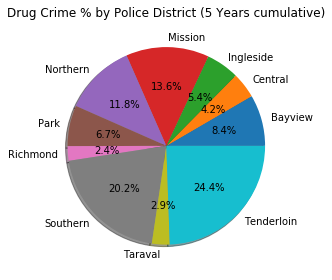

In [7]:
####################### FW ########################

# Calculate Type Percents
type_percent = 100 *clean_drug.groupby(['PdDistrict']).count()['IncidntNum']/ clean_drug['IncidntNum'].count()
# Build Pie Chart
plt.pie(type_percent,
        labels=['Bayview', 'Central', 'Ingleside', 'Mission', 'Northern', 'Park',
                'Richmond', 'Southern', 'Taraval', 'Tenderloin'],
        autopct='%1.1f%%',
        shadow=True)
plt.title('Drug Crime % by Police District (5 Years cumulative)')

plt.tight_layout()

# Save Figure
plt.savefig('plots/pd_perct.png')

plt.show()

In [8]:
####################### FW ########################
# pull out just tenderloin data
searchfor2 = ['TENDERLOIN']
coca_tl = coca[coca['PdDistrict'].str.contains('|'.join(searchfor2))]
heroin_tl = heroin[heroin['PdDistrict'].str.contains('|'.join(searchfor2))]
mj_tl = mj[mj['PdDistrict'].str.contains('|'.join(searchfor2))]
meth_tl = meth[meth['PdDistrict'].str.contains('|'.join(searchfor2))]


# get drug crime rates for each year
coca_13 = len(coca_tl[coca_tl["Year"] == 2013])
coca_14 = len(coca_tl[coca_tl["Year"] == 2014])
coca_15 = len(coca_tl[coca_tl["Year"] == 2015])
coca_16 = len(coca_tl[coca_tl["Year"] == 2016])
coca_17 = len(coca_tl[coca_tl["Year"] == 2017])

heroin_13 = len(heroin_tl[heroin_tl["Year"] == 2013])
heroin_14 = len(heroin_tl[heroin_tl["Year"] == 2014])
heroin_15 = len(heroin_tl[heroin_tl["Year"] == 2015])
heroin_16 = len(heroin_tl[heroin_tl["Year"] == 2016])
heroin_17 = len(heroin_tl[heroin_tl["Year"] == 2017])

mj_13 = len(mj_tl[mj_tl["Year"] == 2013])
mj_14 = len(mj_tl[mj_tl["Year"] == 2014])
mj_15 = len(mj_tl[mj_tl["Year"] == 2015])
mj_16 = len(mj_tl[mj_tl["Year"] == 2016])
mj_17 = len(mj_tl[mj_tl["Year"] == 2017])

meth_13 = len(meth_tl[meth_tl["Year"] == 2013])
meth_14 = len(meth_tl[meth_tl["Year"] == 2014])
meth_15 = len(meth_tl[meth_tl["Year"] == 2015])
meth_16 = len(meth_tl[meth_tl["Year"] == 2016])
meth_17 = len(meth_tl[meth_tl["Year"] == 2017])

coca_years = [coca_13,coca_14,coca_15,coca_16,coca_17]
heroin_years = [heroin_13,heroin_14,heroin_15,heroin_16,heroin_17]
mj_years = [mj_13,mj_14,mj_15,mj_16,mj_17]
meth_years = [meth_13,meth_14,meth_15,meth_16,meth_17]

In [9]:
# ####################### FW ########################

# Use plot.ly to display drug type by year
# set labels for years
plot_years = ['2013', '2014', '2015', '2016', '2017']

trace1 = go.Bar(
    x=plot_years,
    y=meth_years,
    name='Meth'
)
trace2 = go.Bar(
    x=plot_years,
    y=coca_years,
    name='Cocaine'
)

trace3 = go.Bar(
    x=plot_years,
    y=mj_years,
    name='Marijuana'
)
trace4 = go.Bar(
    x=plot_years,
    y=heroin_years,
    name='Heroin'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='category_drug_crime')

# https://plot.ly/~fgmworks/10/meth-cocaine-marijuana-heroin/#/


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
####################### ALL ########################

# filter to Tenderloin only
crime_drug_tenderloin = crime_drug[crime_drug["PdDistrict"] == "TENDERLOIN"]

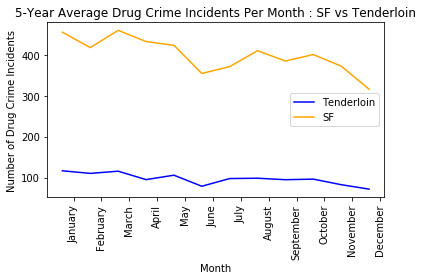

In [12]:
####################### JK ########################

# calculate 5 year average number of drug crime incidents in Tenderloin per each month
months_tl = crime_drug_tenderloin.groupby(["Month"]).count()["IncidntNum"]/5

#  months list in texts
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

#df to merge months list (texts) and calculated average
avg_per_month_summary = pd.DataFrame({"Months" : months,
                                       "Average" : months_tl})

# monthly average for SF drug crime 
# calculate 5 year average number of crime incidents in SF per each month
SF_avg_per_month = crime_drug.groupby(["Month"]).count()["IncidntNum"]/5


#df to merge months list (texts) and calculated average
SF_avg_per_month_summary = pd.DataFrame({"Months" : months,
                                             "Average" : SF_avg_per_month})

# Create a bar chart based upon the above data

x_axis = np.arange(len(avg_per_month_summary))
tick_locations = [value +0.4 for value in x_axis]

plt.xticks(tick_locations, avg_per_month_summary["Months"], rotation="vertical")

monthly_tl, = plt.plot(x_axis, avg_per_month_summary["Average"], color="blue", label="Tenderloin")

monthly_SF, = plt.plot(x_axis, SF_avg_per_month_summary["Average"], color="orange",label="SF")

plt.title("5-Year Average Drug Crime Incidents Per Month : SF vs Tenderloin")
plt.xlabel("Month")
plt.legend("Tenderloin")
plt.legend("SF")

plt.ylabel("Number of Drug Crime Incidents")


# Create a legend for our chart
plt.legend(handles=[monthly_tl,monthly_SF,], loc="best")


plt.tight_layout()

# Save Figure
plt.savefig("plots/Fig2.png")


# Show the chart
plt.show()


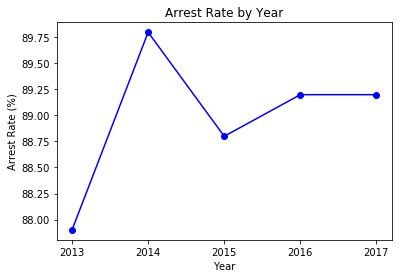

In [13]:
####################### KM ########################

#Drug incidents by year
drugs_year = drugs.groupby(["Year"]).count()

#Drug arrests over the years
arrests = clean_drug[clean_drug["Resolution"].str.contains("ARREST")]
arrests_year = arrests.groupby(["Year"]).count()

# Calculate arrest percents
arrests_pct = round((arrests_year / drugs_year * 100),1)
arrests_pct_reset = arrests_pct.reset_index()

# name variables for plotting
year = arrests_pct_reset["Year"]
year = ["2013","2014","2015","2016","2017"]
incidents = arrests_pct_reset["IncidntNum"]

# plot arrest rate
x_axis = year
y_axis = incidents
plt.xlabel("Year")
plt.ylabel("Arrest Rate (%)")
plt.title("Arrest Rate by Year")
plt.plot(x_axis, y_axis, marker = 'o', color="blue")

plt.savefig("Arrest Rate")

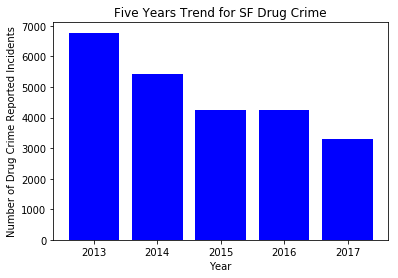

In [14]:
####################### JK ########################

# create variables for each year
yr_13 = crime_drug [crime_drug ["Year"]==2013]
yr_14 = crime_drug [crime_drug ["Year"]==2014]
yr_15 = crime_drug [crime_drug ["Year"]==2015]
yr_16 = crime_drug [crime_drug ["Year"]==2016]
yr_17 = crime_drug [crime_drug ["Year"]==2017]


# Count the number of reported incidents per year
year_2013 = len(yr_13['IncidntNum'])
year_2014 = len(yr_14['IncidntNum'])
year_2015 = len(yr_15['IncidntNum'])
year_2016 = len(yr_16['IncidntNum'])
year_2017 = len(yr_17['IncidntNum'])

yearly_trend = [year_2013, year_2014, year_2015, year_2016, year_2017]

# Create a bar chart based upon the above data
sample_years = ['2013','2014','2015', '2016', '2017']
plt.bar(sample_years, yearly_trend, color="b", align="center")
plt.title("Five Years Trend for SF Drug Crime")
plt.xlabel("Year")
plt.ylabel("Number of Drug Crime Reported Incidents")

plt.savefig("plots/five_years.png")
plt.show()